In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../training_losses/sinh_causal/wandb_export_2025-12-03T14_20_48.286+01_00.csv')
train_loss_asinh_causal = df["100H_causal_sinh - train_loss"].values

In [33]:
df = pd.read_csv('../training_losses/nocausal/wandb_export_2025-12-11T09_02_06.055+01_00.csv')
train_loss_nosinh_nocausal = df["pretraining - train_loss"].values
# filnan by interpolation
nans = np.isnan(train_loss_nosinh_nocausal)
not_nans = ~nans
train_loss_nosinh_nocausal[nans] = np.interp(np.flatnonzero(nans), np.flatnonzero(not_nans), train_loss_nosinh_nocausal[not_nans])

In [34]:
subdf1 = pd.read_csv('../training_losses/sinh_no_causal/1.csv')["train_nocausal_correct_scheduler_pt1 - train_loss"]
subdf2 = pd.read_csv('../training_losses/sinh_no_causal/2.csv')["train_nocausal_correct_scheduler_pt2 - train_loss"]
subdf3 = pd.read_csv('../training_losses/sinh_no_causal/3.csv')["train_nocausal_correct_scheduler_pt3 - train_loss"]
subdf4 = pd.read_csv('../training_losses/sinh_no_causal/4.csv')["pretraining - train_loss"]
subdf5 = pd.read_csv('../training_losses/sinh_no_causal/5.csv')["pretraining - train_loss"]


train_loss_asinh_no_causal = np.concatenate([subdf1[:len(subdf1) - len(subdf1)%500].values,
                            subdf2[:len(subdf2) - len(subdf2)%500].values,
                            subdf3[:len(subdf3) - len(subdf3)%500].values,
                            subdf4[:len(subdf4) - len(subdf4)%500].values,
                            subdf5[:len(subdf5) - len(subdf5)%500].values], axis=0) 

In [35]:
subdf1 = pd.read_csv('../training_losses/causal/pt1.csv')
subdf2 = pd.read_csv('../training_losses/causal/pt2.csv')["causal_nosinh_pt2 - train_loss"]
subdf1 = subdf1[subdf1["Step"]<=10_000]
subdf1 = subdf1["causal_nosinh_pt1 - train_loss"]

train_loss_no_sinh_causal = np.concatenate([subdf1, subdf2], axis=0)

In [36]:
df = pd.read_csv('../training_losses/prefix/full.csv')
df = df[df["Step"]<=22_500]
train_loss_nosinh_prefix = df["pretraining - train_loss"].values

In [37]:
subdf1 = pd.read_csv('../training_losses/sinh_prefix/0_85K.csv')
subdf1 = subdf1[subdf1["Step"]<=8_500]
subdf2 = pd.read_csv('../training_losses/sinh_prefix/85kend.csv')
subdf2 = subdf2[subdf2["Step"]<=14_000]
subdf1 = subdf1["pretraining - train_loss"]
subdf2 = subdf2["pretraining - train_loss"]
train_loss_asinh_prefix = np.concatenate([subdf1, subdf2], axis=0)

In [38]:
dic_model_colors = {
    "Causal RevIN":          "#FF7F00",  # vivid orange
    "Causal RevIN + asinh":  "#573030",  # brown
    "RevIN":                 "#00CC66",  # vivid green
    "RevIN + asinh":         "#0055FF",  # electric deep blue
    "Prefix RevIN":              "#FF3300",  # bright red-orange
    "Prefix RevIN + asinh":      "#CC0099",  # strong magenta
}

dic_model_markers = {
    "Causal RevIN":          "o",   # circle
    "Causal RevIN + asinh":  "x",   # cross
    "RevIN":                 "s",   # square
    "RevIN + asinh":         "d",   # diamond
    "Prefix RevIN":              "^",   # triangle up
    "Prefix RevIN + asinh":      "v",   # triangle down
}

9549


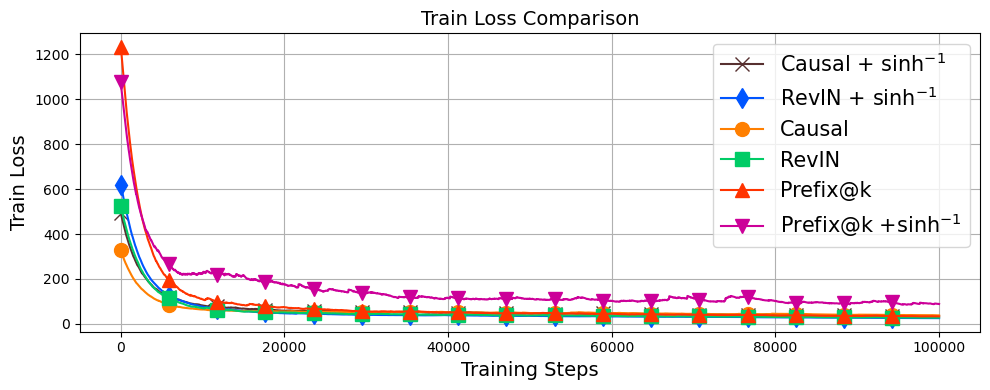

In [39]:
len_asinh_causal = len(train_loss_asinh_causal)
len_asinh_no_causal = len(train_loss_asinh_no_causal)
len_no_sinh_causal = len(train_loss_no_sinh_causal)
len_no_sinh_no_causal = len(train_loss_nosinh_nocausal)
len_no_sinh_prefix = len(train_loss_nosinh_prefix)
len_asinh_prefix = len(train_loss_asinh_prefix)
min_len = min(len_asinh_causal, len_asinh_no_causal, len_no_sinh_causal, len_no_sinh_no_causal, len_no_sinh_prefix, len_asinh_prefix)

x_old_asinh_causal = np.linspace(0, 1, len_asinh_causal)
x_old_asinh_no_causal = np.linspace(0, 1, len_asinh_no_causal)
x_old_no_sinh_causal = np.linspace(0, 1, len_no_sinh_causal)
x_old_no_sinh_no_causal = np.linspace(0, 1, len_no_sinh_no_causal)
x_old_no_sinh_prefix = np.linspace(0, 1, len_no_sinh_prefix)
x_old_asinh_prefix = np.linspace(0, 1, len_asinh_prefix)
x_new = np.linspace(0, 1, min_len)
train_loss_asinh_causal_resampled = np.interp(x_new, x_old_asinh_causal, train_loss_asinh_causal)
train_loss_asinh_no_causal_resampled = np.interp(x_new, x_old_asinh_no_causal, train_loss_asinh_no_causal)
train_loss_no_sinh_causal_resampled = np.interp(x_new, x_old_no_sinh_causal, train_loss_no_sinh_causal)
train_loss_no_sinh_no_causal_resampled = np.interp(x_new, x_old_no_sinh_no_causal, train_loss_nosinh_nocausal)
print(len(train_loss_no_sinh_no_causal_resampled))
train_loss_no_sinh_prefix_resampled = np.interp(x_new, x_old_no_sinh_prefix, train_loss_nosinh_prefix)
train_loss_asinh_prefix_resampled = np.interp(x_new, x_old_asinh_prefix, train_loss_asinh_prefix)

def ema(x, alpha=0.01):
    out = np.zeros_like(x)
    out[0] = x[0]
    for i in range(1, len(x)):
        out[i] = alpha * x[i] + (1-alpha) * out[i-1]
    return out

train_loss_asinh_causal_s = ema(train_loss_asinh_causal_resampled)
train_loss_asinh_no_causal_s = ema(train_loss_asinh_no_causal_resampled)
train_loss_no_sinh_causal_s = ema(train_loss_no_sinh_causal_resampled)
train_loss_no_sinh_no_causal_s = ema(train_loss_no_sinh_no_causal_resampled)
train_loss_no_sinh_prefix_s = ema(train_loss_no_sinh_prefix_resampled)
train_loss_asinh_prefix_s = ema(train_loss_asinh_prefix_resampled)

plt.figure(figsize=(10, 4))

new_x = np.linspace(0, 225000, len(train_loss_asinh_causal_s))

START = 0
END = 100_000

start_index = int(START / 225_000 * len(new_x))
end_index = int(END / 225_000 * len(new_x))

plt.plot(new_x[start_index:end_index], train_loss_asinh_causal_s[start_index:end_index], label=r'Causal + $\sinh^{-1}$', color=dic_model_colors["Causal RevIN + asinh"], marker=dic_model_markers["Causal RevIN + asinh"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_asinh_no_causal_s[start_index:end_index], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"], marker=dic_model_markers["RevIN + asinh"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_no_sinh_causal_s[start_index:end_index], label='Causal', color=dic_model_colors["Causal RevIN"], marker=dic_model_markers["Causal RevIN"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_no_sinh_no_causal_s[start_index:end_index], label='RevIN', color=dic_model_colors["RevIN"], marker=dic_model_markers["RevIN"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_no_sinh_prefix_s[start_index:end_index], label='Prefix@k', color=dic_model_colors["Prefix RevIN"], marker=dic_model_markers["Prefix RevIN"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_asinh_prefix_s[start_index:end_index], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"], marker=dic_model_markers["Prefix RevIN + asinh"], markevery=250, markersize=10)

plt.xlabel('Training Steps', fontsize=14)
plt.ylabel('Train Loss', fontsize=14)
plt.title('Train Loss Comparison', fontsize=14)
plt.legend(fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('figures/trainloss/train_loss_comparison_all2.pdf', format='pdf', dpi=300)
plt.show()

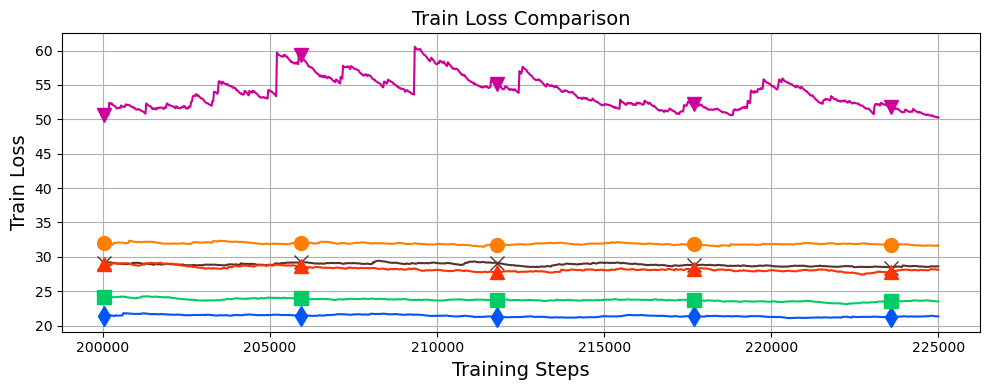

In [40]:
len_asinh_causal = len(train_loss_asinh_causal)
len_asinh_no_causal = len(train_loss_asinh_no_causal)
len_no_sinh_causal = len(train_loss_no_sinh_causal)
len_no_sinh_no_causal = len(train_loss_nosinh_nocausal)
len_no_sinh_prefix = len(train_loss_nosinh_prefix)
len_asinh_prefix = len(train_loss_asinh_prefix)
min_len = min(len_asinh_causal, len_asinh_no_causal, len_no_sinh_causal, len_no_sinh_no_causal, len_no_sinh_prefix, len_asinh_prefix)

x_old_asinh_causal = np.linspace(0, 1, len_asinh_causal)
x_old_asinh_no_causal = np.linspace(0, 1, len_asinh_no_causal)
x_old_no_sinh_causal = np.linspace(0, 1, len_no_sinh_causal)
x_old_no_sinh_no_causal = np.linspace(0, 1, len_no_sinh_no_causal)
x_old_no_sinh_prefix = np.linspace(0, 1, len_no_sinh_prefix)
x_old_asinh_prefix = np.linspace(0, 1, len_asinh_prefix)
x_new = np.linspace(0, 1, min_len)
train_loss_asinh_causal_resampled = np.interp(x_new, x_old_asinh_causal, train_loss_asinh_causal)
train_loss_asinh_no_causal_resampled = np.interp(x_new, x_old_asinh_no_causal, train_loss_asinh_no_causal)
train_loss_no_sinh_causal_resampled = np.interp(x_new, x_old_no_sinh_causal, train_loss_no_sinh_causal)
train_loss_no_sinh_no_causal_resampled = np.interp(x_new, x_old_no_sinh_no_causal, train_loss_nosinh_nocausal)
train_loss_no_sinh_prefix_resampled = np.interp(x_new, x_old_no_sinh_prefix, train_loss_nosinh_prefix)
train_loss_asinh_prefix_resampled = np.interp(x_new, x_old_asinh_prefix, train_loss_asinh_prefix)

def ema(x, alpha=0.01):
    out = np.zeros_like(x)
    out[0] = x[0]
    for i in range(1, len(x)):
        out[i] = alpha * x[i] + (1-alpha) * out[i-1]
    return out

train_loss_asinh_causal_s = ema(train_loss_asinh_causal_resampled)
train_loss_asinh_no_causal_s = ema(train_loss_asinh_no_causal_resampled)
train_loss_no_sinh_causal_s = ema(train_loss_no_sinh_causal_resampled)
train_loss_no_sinh_no_causal_s = ema(train_loss_no_sinh_no_causal_resampled)
train_loss_no_sinh_prefix_s = ema(train_loss_no_sinh_prefix_resampled)
train_loss_asinh_prefix_s = ema(train_loss_asinh_prefix_resampled)

plt.figure(figsize=(10, 4))

new_x = np.linspace(0, 225000, len(train_loss_asinh_causal_s))

START = 200_000
END = 225_000

start_index = int(START / 225_000 * len(new_x))
end_index = int(END / 225_000 * len(new_x))

plt.plot(new_x[start_index:end_index], train_loss_asinh_causal_s[start_index:end_index], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"], marker=dic_model_markers["Causal RevIN + asinh"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_asinh_no_causal_s[start_index:end_index], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"], marker=dic_model_markers["RevIN + asinh"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_no_sinh_causal_s[start_index:end_index], label='Causal', color=dic_model_colors["Causal RevIN"], marker=dic_model_markers["Causal RevIN"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_no_sinh_no_causal_s[start_index:end_index], label='RevIN', color=dic_model_colors["RevIN"], marker=dic_model_markers["RevIN"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_no_sinh_prefix_s[start_index:end_index], label='Prefix@k', color=dic_model_colors["Prefix RevIN"], marker=dic_model_markers["Prefix RevIN"], markevery=250, markersize=10)
plt.plot(new_x[start_index:end_index], train_loss_asinh_prefix_s[start_index:end_index], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"], marker=dic_model_markers["Prefix RevIN + asinh"], markevery=250, markersize=10)

plt.xlabel('Training Steps', fontsize=14)
plt.ylabel('Train Loss', fontsize=14)
plt.title('Train Loss Comparison', fontsize=14)
#plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('figures/trainloss/train_loss_comparison_end2.pdf', format='pdf', dpi=300)
plt.show()